In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

# Task
Generate descriptive statistics for numerical and categorical features in the `X` DataFrame, analyze the distribution of the target variable `y`, create interpretive tables and visualizations to explore relationships between key features in `X` (e.g., 'job', 'marital', 'education') and `y`, and summarize key insights about client subscription behavior.

## Generate Descriptive Statistics for Features

### Subtask:
Calculate and display descriptive statistics for numerical columns (e.g., mean, standard deviation, min, max) and value counts for categorical columns in the 'X' DataFrame to understand their distributions.


**Reasoning**:
First, I will separate the numerical and categorical columns from the 'X' DataFrame to process them accordingly. This will involve identifying columns with numeric dtypes for descriptive statistics and object or category dtypes for value counts.



In [4]:
import numpy as np

numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include='object').columns

print(f"Numerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")

Numerical columns: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


**Reasoning**:
I will display the descriptive statistics for all identified numerical columns in the 'X' DataFrame to understand their central tendency, dispersion, and shape.



In [5]:
print("Descriptive statistics for numerical columns:")
print(X[numerical_cols].describe())

Descriptive statistics for numerical columns:
                age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.0000

**Reasoning**:
Now, I will iterate through each identified categorical column in the 'X' DataFrame and print its value counts to understand the distribution of unique categories within each feature.



In [6]:
print("\nValue counts for categorical columns:")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(X[col].value_counts())


Value counts for categorical columns:

--- job ---
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

--- marital ---
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

--- education ---
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

--- default ---
default
no     44396
yes      815
Name: count, dtype: int64

--- housing ---
housing
yes    25130
no     20081
Name: count, dtype: int64

--- loan ---
loan
no     37967
yes     7244
Name: count, dtype: int64

--- contact ---
contact
cellular     29285
telephone     2906
Name: count, dtype: int64

--- month ---
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep    

## Analyze Target Variable Distribution

### Subtask:
Provide a descriptive summary, such as value counts and percentages, for the target variable 'y' to understand the distribution of client subscriptions.


**Reasoning**:
To understand the distribution of the target variable 'y', I will first calculate the value counts of its unique categories and then compute their respective percentages. This will provide a clear overview of client subscription behavior.



In [7]:
print("Distribution of target variable 'y':")
value_counts_y = y['y'].value_counts()
percentages_y = y['y'].value_counts(normalize=True) * 100

print("\nValue Counts:")
print(value_counts_y)

print("\nPercentages:")
print(percentages_y)

Distribution of target variable 'y':

Value Counts:
y
no     39922
yes     5289
Name: count, dtype: int64

Percentages:
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


## Create Interpretive Tables (Feature-Target Relationship)

### Subtask:
Generate cross-tabulations or grouped statistics to explore the relationship between key features in 'X' (e.g., 'job', 'marital', 'education', 'age_group') and the target variable 'y' (subscription outcome).


**Reasoning**:
To facilitate the analysis of feature-target relationships, I will first combine the feature DataFrame 'X' and the target Series 'y' into a single DataFrame. This will enable straightforward cross-tabulation and grouped statistics calculation.



In [8]:
import pandas as pd

df_combined = pd.concat([X, y], axis=1)

print("Combined DataFrame head:")
print(df_combined.head())

Combined DataFrame head:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  


**Reasoning**:
To analyze the relationship between age and subscription outcome, I will first create a new categorical feature 'age_group' by binning the 'age' column in the combined DataFrame. This will allow for easier interpretation of age-related trends in subscription rates.



In [9]:
bins = [18, 25, 35, 45, 55, 65, 999]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df_combined['age_group'] = pd.cut(df_combined['age'], bins=bins, labels=labels, right=False)

print("DataFrame with 'age_group' column head:")
print(df_combined[['age', 'age_group']].head())

DataFrame with 'age_group' column head:
   age age_group
0   58     56-65
1   44     36-45
2   33     26-35
3   47     46-55
4   33     26-35


**Reasoning**:
I will iterate through the specified categorical features ('job', 'marital', 'education', 'age_group') to generate cross-tabulations with the target variable 'y', calculate the percentage of 'yes' subscriptions for each category, and display these results to understand feature-target relationships.



In [10]:
features_to_analyze = ['job', 'marital', 'education', 'age_group']

for feature in features_to_analyze:
    print(f"\n--- Relationship between {feature} and subscription (y) ---")
    crosstab_df = pd.crosstab(df_combined[feature], df_combined['y'], margins=True)
    print("Cross-tabulation:")
    print(crosstab_df)

    # Calculate percentage of 'yes' subscriptions for each category
    if 'yes' in crosstab_df.columns and 'no' in crosstab_df.columns:
        crosstab_df['yes_percentage'] = (crosstab_df['yes'] / crosstab_df['All']) * 100
        print("\nSubscription 'yes' percentage per category:")
        print(crosstab_df[['yes', 'All', 'yes_percentage']].sort_values(by='yes_percentage', ascending=False))
    elif 'yes' in crosstab_df.columns and 'no' not in crosstab_df.columns:
        crosstab_df['yes_percentage'] = (crosstab_df['yes'] / crosstab_df['All']) * 100
        print("\nSubscription 'yes' percentage per category:")
        print(crosstab_df[['yes', 'All', 'yes_percentage']].sort_values(by='yes_percentage', ascending=False))
    else:
        print("No 'yes' subscriptions found in this feature's cross-tabulation.")


--- Relationship between job and subscription (y) ---
Cross-tabulation:
y                 no   yes    All
job                              
admin.          4540   631   5171
blue-collar     9024   708   9732
entrepreneur    1364   123   1487
housemaid       1131   109   1240
management      8157  1301   9458
retired         1748   516   2264
self-employed   1392   187   1579
services        3785   369   4154
student          669   269    938
technician      6757   840   7597
unemployed      1101   202   1303
All            39668  5255  44923

Subscription 'yes' percentage per category:
y               yes    All  yes_percentage
job                                       
student         269    938       28.678038
retired         516   2264       22.791519
unemployed      202   1303       15.502686
management     1301   9458       13.755551
admin.          631   5171       12.202669
self-employed   187   1579       11.842939
All            5255  44923       11.697794
technician      840

## Visualize Key Interpretive Findings

### Subtask:
Create relevant plots (e.g., bar charts) to visualize the most significant relationships identified in the interpretive tables, comparing feature distributions against the 'y' target variable. Ensure all plots include appropriate legends.


**Reasoning**:
To visualize the relationships, I will import the necessary plotting libraries, `matplotlib.pyplot` and `seaborn`.



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported.")

Libraries matplotlib.pyplot and seaborn imported.


**Reasoning**:
I will iterate through each specified categorical feature, calculate the 'yes' subscription percentage, and then create a bar chart to visualize this relationship, ordering the bars by percentage in descending order.



/tmp/ipython-input-2205313846.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y='yes_percentage', data=plot_data, palette='viridis')


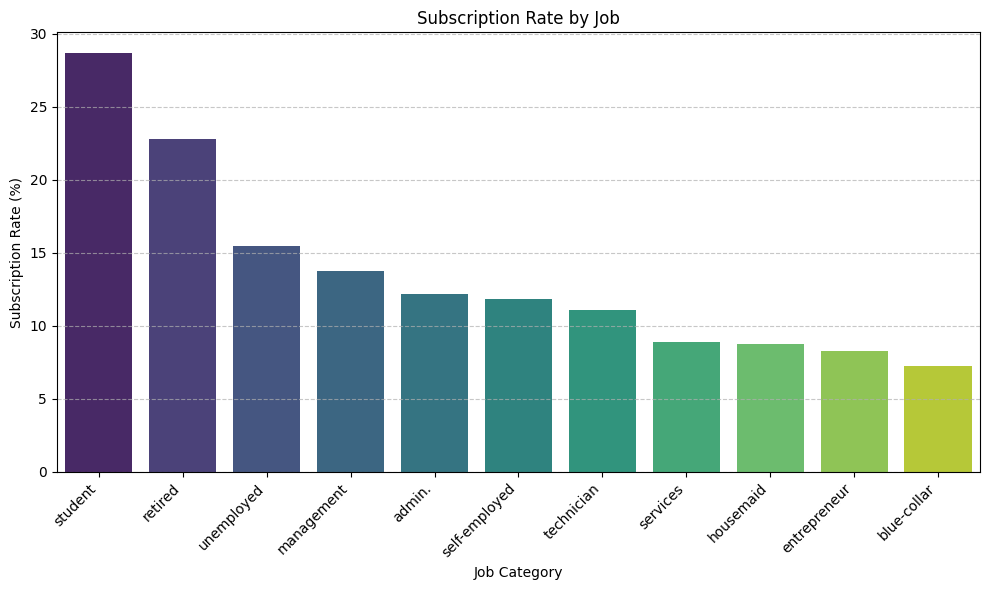

/tmp/ipython-input-2205313846.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y='yes_percentage', data=plot_data, palette='viridis')


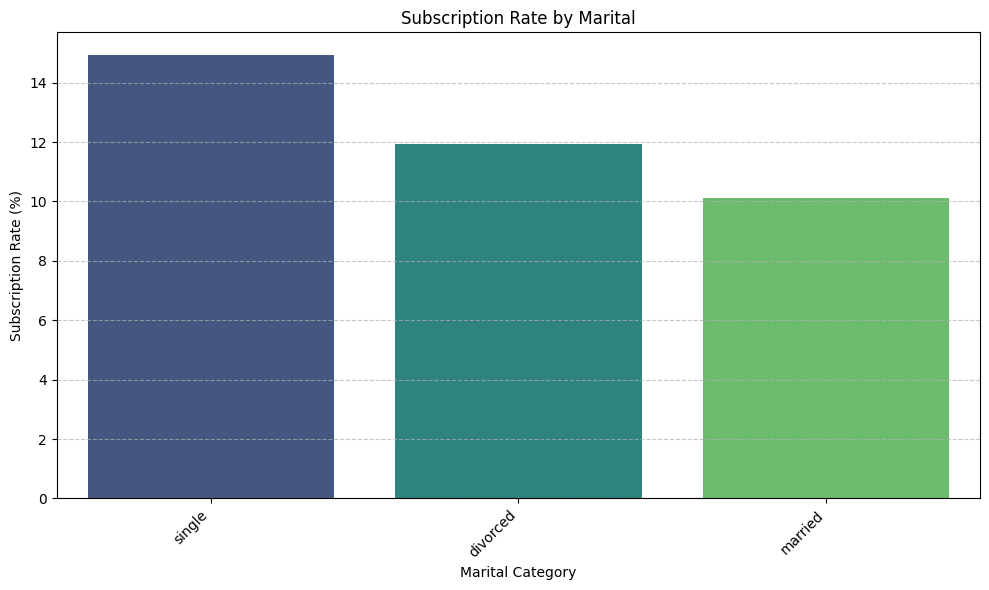

/tmp/ipython-input-2205313846.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y='yes_percentage', data=plot_data, palette='viridis')


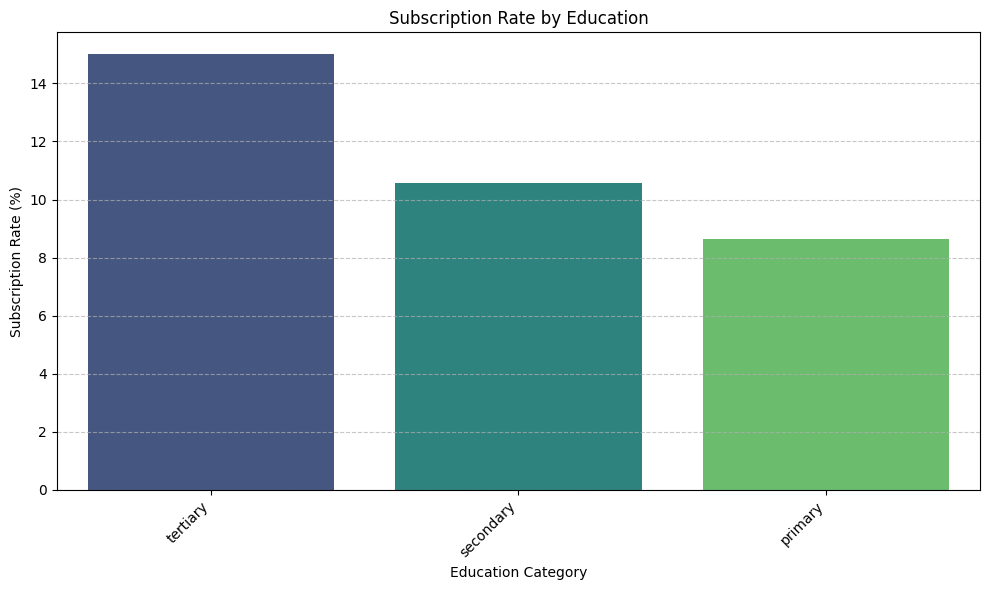

/tmp/ipython-input-2205313846.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y='yes_percentage', data=plot_data, palette='viridis')


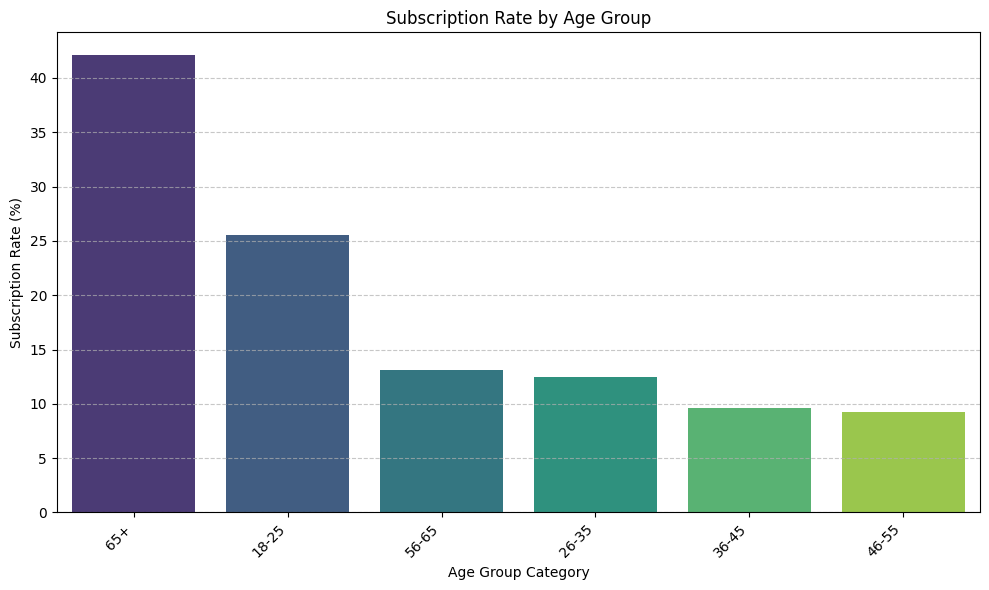

In [12]:
for feature in features_to_analyze:
    # Recalculate crosstab for each feature to ensure 'yes_percentage' is correctly derived
    crosstab_df = pd.crosstab(df_combined[feature], df_combined['y'], margins=True)

    # Calculate percentage of 'yes' subscriptions for each category
    if 'yes' in crosstab_df.columns and 'All' in crosstab_df.columns:
        crosstab_df['yes_percentage'] = (crosstab_df['yes'] / crosstab_df['All']) * 100

        # Exclude the 'All' row for plotting, as it represents the total average
        plot_data = crosstab_df.drop('All', axis=0, errors='ignore').sort_values(by='yes_percentage', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=plot_data.index, y='yes_percentage', data=plot_data, palette='viridis')
        plt.title(f'Subscription Rate by {feature.replace("_", " ").title()}')
        plt.xlabel(f'{feature.replace("_", " ").title()} Category')
        plt.ylabel('Subscription Rate (%)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Could not plot for {feature}: 'yes' or 'All' column missing in crosstab.")

**Reasoning**:
The previous code produced `FutureWarning` messages due to the usage of `palette` in `sns.barplot` without assigning `hue`. To address this, I will modify the `sns.barplot` call by explicitly assigning the `x` variable to `hue` and setting `legend=False` as suggested by the warning.



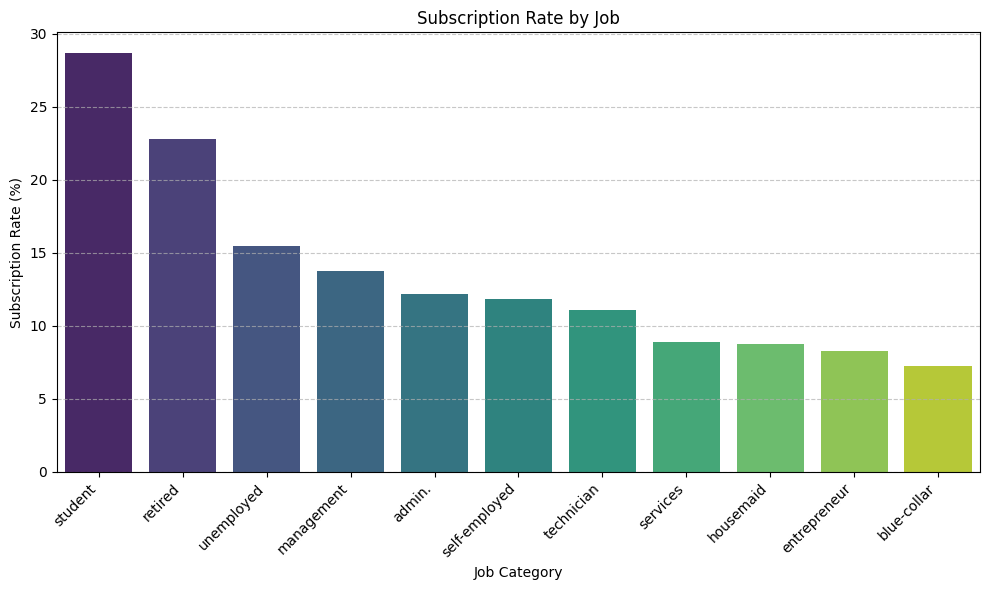

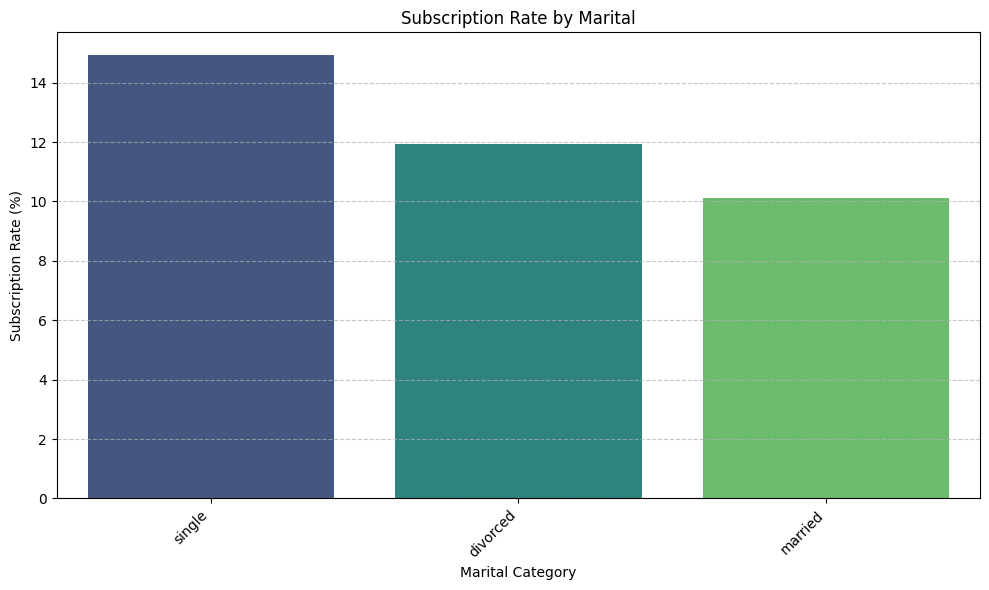

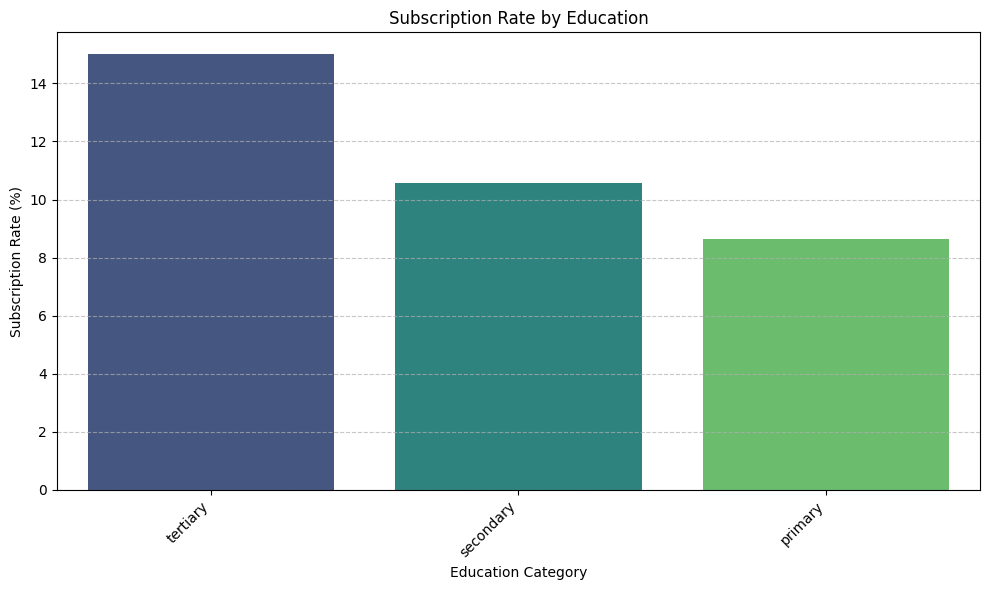

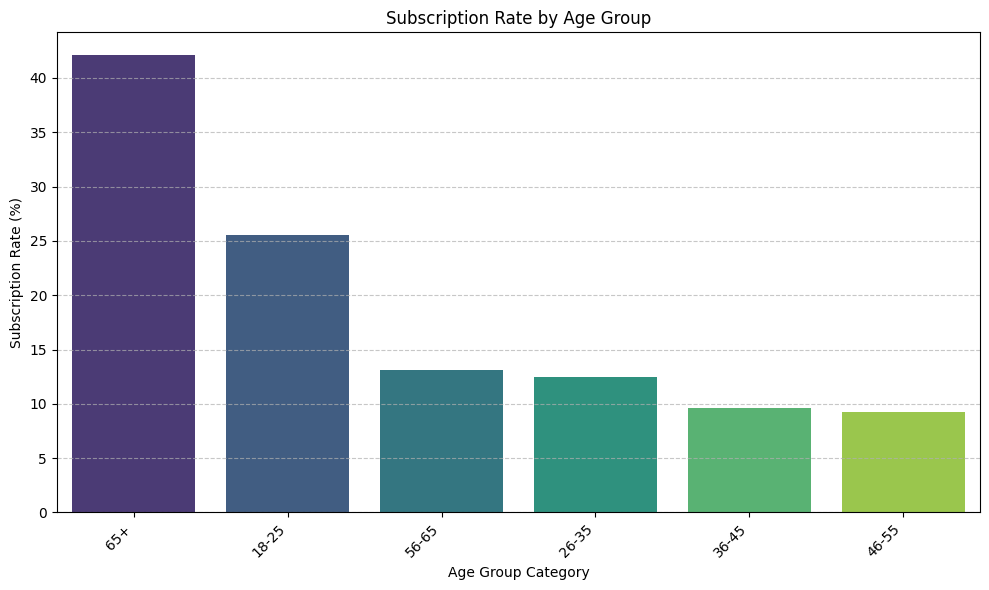

In [13]:
for feature in features_to_analyze:
    # Recalculate crosstab for each feature to ensure 'yes_percentage' is correctly derived
    crosstab_df = pd.crosstab(df_combined[feature], df_combined['y'], margins=True)

    # Calculate percentage of 'yes' subscriptions for each category
    if 'yes' in crosstab_df.columns and 'All' in crosstab_df.columns:
        crosstab_df['yes_percentage'] = (crosstab_df['yes'] / crosstab_df['All']) * 100

        # Exclude the 'All' row for plotting, as it represents the total average
        plot_data = crosstab_df.drop('All', axis=0, errors='ignore').sort_values(by='yes_percentage', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=plot_data.index, y='yes_percentage', data=plot_data, palette='viridis', hue=plot_data.index, legend=False)
        plt.title(f'Subscription Rate by {feature.replace("_", " ").title()}')
        plt.xlabel(f'{feature.replace("_", " ").title()} Category')
        plt.ylabel('Subscription Rate (%)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Could not plot for {feature}: 'yes' or 'All' column missing in crosstab.")

## Final Task

### Subtask:
Provide a summary of the descriptive and interpretive findings presented in the tables and visualizations, highlighting key insights about client subscription behavior.


## Summary:

### Data Analysis Key Findings

*   **Target Variable Imbalance**: The target variable 'y' (client subscription) is highly imbalanced, with 88.30% of clients not subscribing ('no') and only 11.70% subscribing ('yes').
*   **Numerical Feature Distribution**:
    *   The `balance` column shows a wide range, including negative values (minimum: -8019), suggesting potential overdrafts or debt.
    *   `duration` has a minimum value of 0, indicating some calls ended immediately.
    *   `pdays` has a minimum of -1, which likely denotes no previous contact for a significant number of clients.
*   **Key Categorical Feature Distributions**:
    *   'blue-collar' and 'management' are the most frequent job types.
    *   'married' is the predominant marital status.
    *   'secondary' education is the most common level.
    *   The vast majority of clients do not have credit in default.
    *   'cellular' is the primary contact method.
    *   May is the month with the highest number of contacts.
    *   'failure' is the most common outcome of previous marketing campaigns.
*   **Job and Subscription Rate**: Clients in 'student' (28.68%) and 'retired' (22.79%) job categories exhibit significantly higher subscription rates, while 'blue-collar' (7.27%) and 'entrepreneur' (8.27%) show the lowest.
*   **Marital Status and Subscription Rate**: 'single' individuals (14.95%) have a higher subscription rate compared to 'divorced' (11.95%) and 'married' (10.12%) individuals.
*   **Education Level and Subscription Rate**: Clients with 'tertiary' education (15.01%) are most likely to subscribe, followed by 'secondary' (10.56%) and 'primary' (8.63%).
*   **Age Group and Subscription Rate**: The '65+' (42.10%) and '18-25' (25.59%) age groups show markedly higher subscription rates than middle-aged groups, with '36-45' (9.66%) and '46-55' (9.27%) having the lowest rates.

### Insights or Next Steps

*   Target marketing efforts towards demographics with higher subscription rates, such as students, retired individuals, single people, those with tertiary education, and younger (18-25) or older (65+) age groups.
*   Investigate the reasons behind the very low subscription rates in specific groups (e.g., 'blue-collar' job, middle-aged clients) to tailor strategies or refine messaging for these segments.
